In [22]:
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/me.pranesh/Desktop/new clean/city_day.csv')

print("Dataset Loaded Successfully!")
print(df.info())

print(df.head())

print("\nMissing Values Per Column:")
print(df.isnull().sum())


Dataset Loaded Successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB
None
        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3   

In [23]:
df.drop(columns=['Xylene', 'Toluene', 'Benzene'], inplace=True)

pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'AQI']

df.dropna(subset=pollutants, how='all', inplace=True)

df.dropna(subset=['PM2.5', 'PM10'], how='all', inplace=True)

print("\nMissing Values After Dropping Unwanted Rows:")
print(df.isnull().sum())

print("\nUpdated Dataset Shape:", df.shape)



Missing Values After Dropping Unwanted Rows:
City             0
Date             0
PM2.5          759
PM10          7301
NO             385
NO2            395
NOx           2006
NH3           6814
CO             448
SO2            593
O3             840
AQI            902
AQI_Bucket     902
dtype: int64

Updated Dataset Shape: (25692, 13)


In [24]:
print(df['City'].value_counts())


City
Delhi                 2007
Bengaluru             1925
Lucknow               1907
Hyderabad             1893
Chennai               1892
Patna                 1537
Gurugram              1525
Ahmedabad             1382
Visakhapatnam         1237
Amritsar              1177
Jaipur                1102
Thiruvananthapuram    1077
Amaravati              896
Jorapokhar             896
Mumbai                 784
Brajrajnagar           775
Talcher                771
Kolkata                759
Guwahati               502
Coimbatore             380
Chandigarh             304
Bhopal                 280
Shillong               251
Kochi                  162
Ernakulam              158
Aizawl                 113
Name: count, dtype: int64


In [25]:
cities_to_drop = ['Coimbatore', 'Chandigarh', 'Bhopal', 'Shillong', 'Kochi', 'Ernakulam', 'Aizawl']

df = df[~df['City'].isin(cities_to_drop)]

print("\nUpdated Dataset Shape After Dropping Cities:", df.shape)

print("\nRemaining Cities:")
print(df['City'].value_counts())



Updated Dataset Shape After Dropping Cities: (24044, 13)

Remaining Cities:
City
Delhi                 2007
Bengaluru             1925
Lucknow               1907
Hyderabad             1893
Chennai               1892
Patna                 1537
Gurugram              1525
Ahmedabad             1382
Visakhapatnam         1237
Amritsar              1177
Jaipur                1102
Thiruvananthapuram    1077
Amaravati              896
Jorapokhar             896
Mumbai                 784
Brajrajnagar           775
Talcher                771
Kolkata                759
Guwahati               502
Name: count, dtype: int64


In [26]:
print("Duplicate Rows:", df.duplicated().sum())


Duplicate Rows: 0


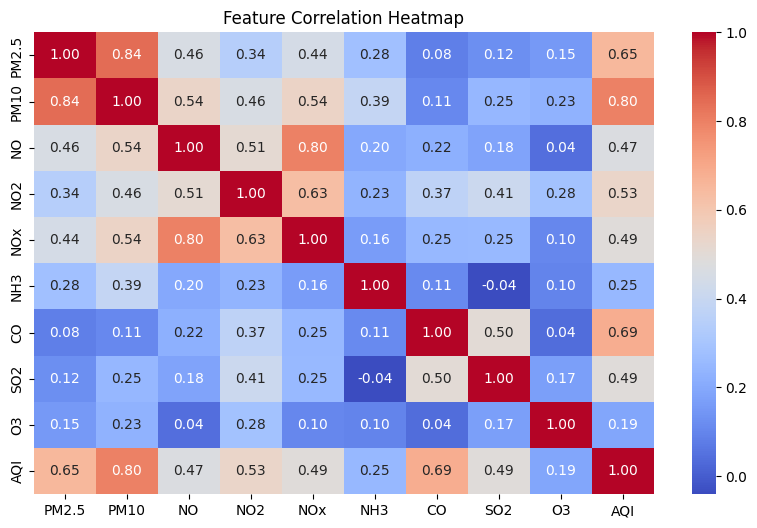

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

numeric_df = df.select_dtypes(include=[np.number])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [28]:
df.drop(columns=['NOx'], inplace=True)

print("\nUpdated Dataset Shape After Dropping NOx:", df.shape)

print("\nRemaining Columns:", df.columns.tolist())



Updated Dataset Shape After Dropping NOx: (24044, 12)

Remaining Columns: ['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NH3', 'CO', 'SO2', 'O3', 'AQI', 'AQI_Bucket']



Total Outliers Detected: 1203 (5.00% of dataset)


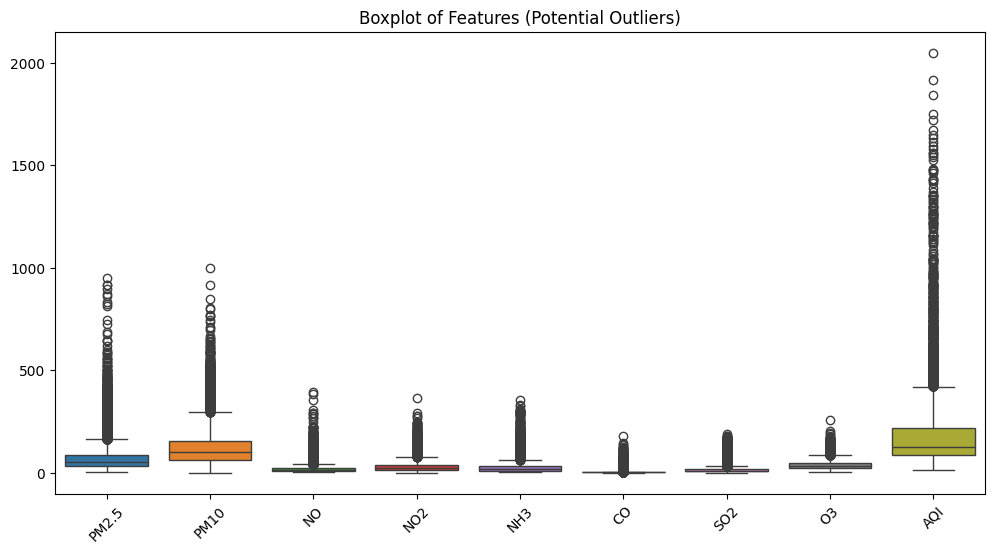

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

numeric_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NH3', 'CO', 'SO2', 'O3', 'AQI']

iso_forest = IsolationForest(contamination=0.05, random_state=42)  # Assuming 5% contamination (adjustable)

df['Outlier'] = iso_forest.fit_predict(df[numeric_cols])

outlier_count = (df['Outlier'] == -1).sum()
total_count = df.shape[0]
outlier_percentage = (outlier_count / total_count) * 100

print(f"\nTotal Outliers Detected: {outlier_count} ({outlier_percentage:.2f}% of dataset)")

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=45)
plt.title("Boxplot of Features (Potential Outliers)")
plt.show()


In [30]:
import numpy as np

numeric_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NH3', 'CO', 'SO2', 'O3', 'AQI']

lower_bound = df[numeric_cols].quantile(0.01)
upper_bound = df[numeric_cols].quantile(0.99)

df[numeric_cols] = df[numeric_cols].clip(lower=lower_bound, upper=upper_bound, axis=1)

print("\nOutliers Capped. Updated Statistics:")
print(df[numeric_cols].describe())



Outliers Capped. Updated Statistics:
              PM2.5          PM10            NO           NO2           NH3  \
count  23309.000000  16755.000000  23721.000000  23723.000000  17379.000000   
mean      68.724437    122.617810     17.418253     29.224013     23.652715   
std       59.073637     87.456556     20.135329     22.889968     22.526597   
min        8.730800     18.273200      0.930000      3.000000      1.447800   
25%       30.370000     61.125000      5.900000     12.435000      9.130000   
50%       50.600000     99.770000     10.090000     22.680000     16.250000   
75%       83.300000    154.775000     20.380000     38.565000     30.775000   
max      317.939200    451.033600    113.466000    120.642400    134.853000   

                 CO           SO2            O3           AQI  
count  23596.000000  23451.000000  23373.000000  23244.000000  
mean       2.213990     14.538151     34.961162    168.643126  
std        5.235839     16.557646     20.821542    123.873

In [31]:
import pandas as pd

print("\nData Types Before Processing:")
print(df.dtypes)

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

duplicate_count = df.duplicated().sum()
print(f"\nTotal Duplicate Rows: {duplicate_count}")

numeric_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NH3', 'CO', 'SO2', 'O3', 'AQI']
negative_values = (df[numeric_cols] < 0).sum()

print("\nNegative Value Count Per Column:")
print(negative_values)

df[numeric_cols] = df[numeric_cols].applymap(lambda x: x if x >= 0 else pd.NA)

print("\nFinal Dataset Info After Preprocessing Check:")
print(df.info())



Data Types Before Processing:
City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
AQI           float64
AQI_Bucket     object
Outlier         int64
dtype: object

Total Duplicate Rows: 0

Negative Value Count Per Column:
PM2.5    0
PM10     0
NO       0
NO2      0
NH3      0
CO       0
SO2      0
O3       0
AQI      0
dtype: int64

Final Dataset Info After Preprocessing Check:
<class 'pandas.core.frame.DataFrame'>
Index: 24044 entries, 27 to 29530
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        24044 non-null  object        
 1   Date        24044 non-null  datetime64[ns]
 2   PM2.5       23309 non-null  object        
 3   PM10        16755 non-null  object        
 4   NO          23721 non-null  object        
 5   NO2  

/var/folders/5c/ttrql3v94vx3w3dr_82ptp280000gn/T/ipykernel_8823/515069750.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[numeric_cols] = df[numeric_cols].applymap(lambda x: x if x >= 0 else pd.NA)


In [32]:
numeric_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NH3', 'CO', 'SO2', 'O3', 'AQI']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

print("\nUpdated Data Types:")
print(df.dtypes)

print("\nNon-Numeric Value Check (Should be 0):")
print(df[numeric_cols].applymap(lambda x: isinstance(x, str)).sum())



Updated Data Types:
City                  object
Date          datetime64[ns]
PM2.5                float64
PM10                 float64
NO                   float64
NO2                  float64
NH3                  float64
CO                   float64
SO2                  float64
O3                   float64
AQI                  float64
AQI_Bucket            object
Outlier                int64
dtype: object

Non-Numeric Value Check (Should be 0):
PM2.5    0
PM10     0
NO       0
NO2      0
NH3      0
CO       0
SO2      0
O3       0
AQI      0
dtype: int64


/var/folders/5c/ttrql3v94vx3w3dr_82ptp280000gn/T/ipykernel_8823/388464787.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(df[numeric_cols].applymap(lambda x: isinstance(x, str)).sum())


In [33]:
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

print("\nDataset After Setting Date as Index:")
print(df.head())



Dataset After Setting Date as Index:
             City   PM2.5      PM10     NO    NO2     NH3     CO   SO2     O3  \
Date                                                                            
2015-01-01  Delhi  313.22  451.0336  69.16  36.39   33.85  15.20  9.25  41.68   
2015-01-02  Delhi  186.18  269.5500  62.09  32.87   31.83   9.54  6.65  29.97   
2015-01-03  Delhi   87.18  131.9000  25.73  30.31   69.55  10.61  2.65  19.71   
2015-01-04  Delhi  151.84  241.8400  25.01  36.91  130.36  11.54  4.63  25.36   
2015-01-05  Delhi  146.60  219.1300  14.01  34.92  122.88   9.20  3.33  23.20   

              AQI AQI_Bucket  Outlier  
Date                                   
2015-01-01  472.0     Severe       -1  
2015-01-02  454.0     Severe        1  
2015-01-03  143.0   Moderate        1  
2015-01-04  319.0  Very Poor        1  
2015-01-05  325.0  Very Poor        1  


In [34]:
from sklearn.experimental import enable_iterative_imputer  # Enable it explicitly
from sklearn.impute import IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

iter_imputer = IterativeImputer(random_state=42)
df[['PM2.5', 'PM10']] = iter_imputer.fit_transform(df[['PM2.5', 'PM10']])

df[['NO', 'NO2', 'CO', 'SO2', 'O3']] = df[['NO', 'NO2', 'CO', 'SO2', 'O3']].interpolate(method='time')

df[['NH3']] = iter_imputer.fit_transform(df[['NH3']])

print("\nMissing Values After Imputation (Excluding AQI & AQI_Bucket):")
print(df.isnull().sum())



Missing Values After Imputation (Excluding AQI & AQI_Bucket):
City            0
PM2.5           0
PM10            0
NO              0
NO2             0
NH3             0
CO              0
SO2             0
O3              0
AQI           800
AQI_Bucket    800
Outlier         0
dtype: int64


In [35]:
import numpy as np

aqi_breakpoints = {
    'PM2.5': [(0, 30, 0, 50), (31, 60, 51, 100), (61, 90, 101, 200), (91, 120, 201, 300),
              (121, 250, 301, 400), (251, 500, 401, 500)],
    'PM10': [(0, 50, 0, 50), (51, 100, 51, 100), (101, 250, 101, 200), (251, 350, 201, 300),
             (351, 430, 301, 400), (431, 600, 401, 500)],
    'NO2': [(0, 40, 0, 50), (41, 80, 51, 100), (81, 180, 101, 200), (181, 280, 201, 300),
            (281, 400, 301, 400), (401, 1000, 401, 500)],
    'SO2': [(0, 40, 0, 50), (41, 80, 51, 100), (81, 380, 101, 200), (381, 800, 201, 300),
            (801, 1600, 301, 400), (1601, 2000, 401, 500)],
    'CO': [(0, 1, 0, 50), (1.1, 2, 51, 100), (2.1, 10, 101, 200), (10.1, 17, 201, 300),
           (17.1, 34, 301, 400), (34.1, 50, 401, 500)],
    'O3': [(0, 50, 0, 50), (51, 100, 51, 100), (101, 168, 101, 200), (169, 208, 201, 300),
           (209, 748, 301, 400), (749, 1000, 401, 500)]
}

def calculate_aqi(concentration, breakpoints):
    """Compute AQI using breakpoints."""
    for C_low, C_high, I_low, I_high in breakpoints:
        if C_low <= concentration <= C_high:
            return ((I_high - I_low) / (C_high - C_low)) * (concentration - C_low) + I_low
    return None  # If value is out of range

def compute_aqi_for_row(row):
    aqi_values = [
        calculate_aqi(row[pollutant], breakpoints)
        for pollutant, breakpoints in aqi_breakpoints.items()
        if not np.isnan(row[pollutant])
    ]
    aqi_values = [val for val in aqi_values if val is not None]
    return max(aqi_values) if aqi_values else np.nan  # Take the worst AQI (max value)

df.loc[df['AQI'].isnull(), 'AQI'] = df[df['AQI'].isnull()].apply(compute_aqi_for_row, axis=1)

bins = [0, 50, 100, 200, 300, 400, float('inf')]
labels = ['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe']
df['AQI_Bucket'] = pd.cut(df['AQI'], bins=bins, labels=labels, right=False)

print("\nMissing Values After AQI Imputation:")
print(df.isnull().sum())



Missing Values After AQI Imputation:
City          0
PM2.5         0
PM10          0
NO            0
NO2           0
NH3           0
CO            0
SO2           0
O3            0
AQI           0
AQI_Bucket    0
Outlier       0
dtype: int64


In [36]:
import numpy as np

df["Computed_AQI"] = df.apply(compute_aqi_for_row, axis=1)

df["AQI_Difference"] = abs(df["AQI"] - df["Computed_AQI"])

mean_diff = df["AQI_Difference"].mean()
std_diff = df["AQI_Difference"].std()

threshold = mean_diff + 2 * std_diff

df["Flagged_AQI_Anomaly"] = (df["AQI_Difference"] > threshold).astype(int)

num_flagged = df["Flagged_AQI_Anomaly"].sum()
print(f"🚨 Total Flagged Rows: {num_flagged} ({(num_flagged / len(df)) * 100:.2f}%) of dataset.")

print("\nSample Flagged Rows:")
print(df[df["Flagged_AQI_Anomaly"] == 1][["AQI", "Computed_AQI", "AQI_Difference"]].head(10))


🚨 Total Flagged Rows: 939 (3.91%) of dataset.

Sample Flagged Rows:
               AQI  Computed_AQI  AQI_Difference
Date                                            
2015-01-31  514.00    343.704734      170.295266
2015-02-01  684.57    415.015660      269.554340
2015-02-02  684.57    415.015660      269.554340
2015-02-03  660.00    380.141420      279.858580
2015-02-04  294.00    168.081034      125.918966
2015-02-08  379.00    186.465823      192.534177
2015-02-11  388.00    154.134177      233.865823
2015-02-13  510.00    307.326627      202.673373
2015-02-14  684.57    415.015660      269.554340
2015-02-15  475.00    279.195652      195.804348


In [37]:
df['Reported_AQI'] = df['AQI']  # Preserve the reported AQI for transparency

df['AQI'] = df.apply(lambda row: row['Computed_AQI'] if row['Flagged_AQI_Anomaly'] == 1 else row['AQI'], axis=1)

print(f"Total Rows Modified: {df['Flagged_AQI_Anomaly'].sum()}")
print("\nSample Updated Rows:")
print(df[df['Flagged_AQI_Anomaly'] == 1][['Reported_AQI', 'Computed_AQI', 'AQI']].head(10))


Total Rows Modified: 939

Sample Updated Rows:
            Reported_AQI  Computed_AQI         AQI
Date                                              
2015-01-31        514.00    343.704734  343.704734
2015-02-01        684.57    415.015660  415.015660
2015-02-02        684.57    415.015660  415.015660
2015-02-03        660.00    380.141420  380.141420
2015-02-04        294.00    168.081034  168.081034
2015-02-08        379.00    186.465823  186.465823
2015-02-11        388.00    154.134177  154.134177
2015-02-13        510.00    307.326627  307.326627
2015-02-14        684.57    415.015660  415.015660
2015-02-15        475.00    279.195652  279.195652


In [38]:
df.rename(columns={'AQI_Bucket': 'Reported_AQI_Bucket'}, inplace=True)

bins = [0, 50, 100, 200, 300, 400, float('inf')]
labels = ['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe']

df['AQI_Bucket'] = pd.cut(df['AQI'], bins=bins, labels=labels, right=False)

print("\nUpdated AQI Bucket Assigned Successfully!")
print(df[['Reported_AQI_Bucket', 'AQI_Bucket']].head(10))



Updated AQI Bucket Assigned Successfully!
           Reported_AQI_Bucket AQI_Bucket
Date                                     
2015-01-01              Severe     Severe
2015-01-02              Severe     Severe
2015-01-03            Moderate   Moderate
2015-01-04           Very Poor  Very Poor
2015-01-05           Very Poor  Very Poor
2015-01-06           Very Poor  Very Poor
2015-01-07           Very Poor  Very Poor
2015-01-08           Very Poor  Very Poor
2015-01-09           Very Poor  Very Poor
2015-01-10           Very Poor  Very Poor


In [39]:
df_check = df[df['Reported_AQI_Bucket'] != df['AQI_Bucket']][['Reported_AQI_Bucket', 'AQI_Bucket', 'AQI', 'Reported_AQI']]
print("\n🔍 Rows Where AQI Bucket Changed:")
print(df_check.head(10))


🔍 Rows Where AQI Bucket Changed:
           Reported_AQI_Bucket AQI_Bucket         AQI  Reported_AQI
Date                                                               
2015-01-31              Severe  Very Poor  343.704734         514.0
2015-02-03              Severe  Very Poor  380.141420         660.0
2015-02-04                Poor   Moderate  168.081034         294.0
2015-02-08           Very Poor   Moderate  186.465823         379.0
2015-02-11           Very Poor   Moderate  154.134177         388.0
2015-02-13              Severe  Very Poor  307.326627         510.0
2015-02-15              Severe       Poor  279.195652         475.0
2015-02-16              Severe  Very Poor  317.109467         536.0
2015-02-17              Severe       Poor  285.078261         479.0
2015-02-18              Severe       Poor  289.095652         592.0


In [40]:
df.head()


,City,PM2.5,PM10,NO,NO2,NH3,CO,SO2,O3,AQI,Reported_AQI_Bucket,Outlier,Computed_AQI,AQI_Difference,Flagged_AQI_Anomaly,Reported_AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,,,
2015-01-01,Delhi,313.22,451.0336,69.16,36.39,33.85,15.20,9.25,41.68,472.0,Severe,-1,425.738072,46.261928,0,472.0,Severe
2015-01-02,Delhi,186.18,269.5500,62.09,32.87,31.83,9.54,6.65,29.97,454.0,Severe,1,351.021860,102.978140,0,454.0,Severe
2015-01-03,Delhi,87.18,131.9000,25.73,30.31,69.55,10.61,2.65,19.71,143.0,Moderate,1,208.317391,65.317391,0,143.0,Moderate
2015-01-04,Delhi,151.84,241.8400,25.01,36.91,130.36,11.54,4.63,25.36,319.0,Very Poor,1,324.667907,5.667907,0,319.0,Very Poor
2015-01-05,Delhi,146.60,219.1300,14.01,34.92,122.88,9.20,3.33,23.20,325.0,Very Poor,1,320.646512,4.353488,0,325.0,Very Poor


In [41]:
df.drop(columns=['Outlier', 'Flagged_AQI_Anomaly'], inplace=True)

print("Updated Columns After Dropping Outliers & Anomaly Flags:\n", df.columns)


Updated Columns After Dropping Outliers & Anomaly Flags:
 Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NH3', 'CO', 'SO2', 'O3', 'AQI',
       'Reported_AQI_Bucket', 'Computed_AQI', 'AQI_Difference', 'Reported_AQI',
       'AQI_Bucket'],
      dtype='object')


In [42]:
df.drop(columns=['AQI', 'AQI_Difference', 'Reported_AQI_Bucket'], inplace=True)
print("Updated Columns After Dropping Outliers & Anomaly Flags:\n", df.columns)


Updated Columns After Dropping Outliers & Anomaly Flags:
 Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NH3', 'CO', 'SO2', 'O3',
       'Computed_AQI', 'Reported_AQI', 'AQI_Bucket'],
      dtype='object')


In [43]:
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['DayOfWeek'] = df.index.dayofweek

print(df[['Year', 'Month', 'Day', 'DayOfWeek']].head())


            Year  Month  Day  DayOfWeek
Date                                   
2015-01-01  2015      1    1          3
2015-01-02  2015      1    2          4
2015-01-03  2015      1    3          5
2015-01-04  2015      1    4          6
2015-01-05  2015      1    5          0


In [44]:
df['AQI_lag_1'] = df['Computed_AQI'].shift(1)
df['PM2.5_lag_1'] = df['PM2.5'].shift(1)
df['PM10_lag_1'] = df['PM10'].shift(1)

df['PM2.5_rolling_mean_3'] = df['PM2.5'].rolling(window=3, min_periods=1).mean()
df['PM10_rolling_mean_3'] = df['PM10'].rolling(window=3, min_periods=1).mean()

print(df[['AQI_lag_1', 'PM2.5_lag_1', 'PM10_lag_1', 'PM2.5_rolling_mean_3', 'PM10_rolling_mean_3']].head(10))


             AQI_lag_1  PM2.5_lag_1  PM10_lag_1  PM2.5_rolling_mean_3  \
Date                                                                    
2015-01-01         NaN          NaN         NaN            313.220000   
2015-01-02  425.738072       313.22    451.0336            249.700000   
2015-01-03  351.021860       186.18    269.5500            195.526667   
2015-01-04  208.317391        87.18    131.9000            141.733333   
2015-01-05  324.667907       151.84    241.8400            128.540000   
2015-01-06  320.646512       146.60    219.1300            149.340000   
2015-01-07  322.933488       149.58    252.1000            171.350000   
2015-01-08  375.342093       217.87    376.5100            199.116667   
2015-01-09  384.574419       229.90    360.9500            216.476667   
2015-01-10  362.901860       201.66    397.4300            217.526667   

            PM10_rolling_mean_3  
Date                             
2015-01-01           451.033600  
2015-01-02           

In [45]:
from sklearn.preprocessing import LabelEncoder
from pandas.api.types import CategoricalDtype

city_encoder = LabelEncoder()
df['City_Encoded'] = city_encoder.fit_transform(df['City'])

aqi_order = ['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe']
aqi_cat_type = CategoricalDtype(categories=aqi_order, ordered=True)

df['AQI_Bucket'] = df['AQI_Bucket'].astype(aqi_cat_type)
df['AQI_Bucket_Encoded'] = df['AQI_Bucket'].cat.codes

print(df[['City', 'City_Encoded', 'AQI_Bucket', 'AQI_Bucket_Encoded']].head(10))


             City  City_Encoded AQI_Bucket  AQI_Bucket_Encoded
Date                                                          
2015-01-01  Delhi             6     Severe                   5
2015-01-02  Delhi             6     Severe                   5
2015-01-03  Delhi             6   Moderate                   2
2015-01-04  Delhi             6  Very Poor                   4
2015-01-05  Delhi             6  Very Poor                   4
2015-01-06  Delhi             6  Very Poor                   4
2015-01-07  Delhi             6  Very Poor                   4
2015-01-08  Delhi             6  Very Poor                   4
2015-01-09  Delhi             6  Very Poor                   4
2015-01-10  Delhi             6  Very Poor                   4


In [46]:
def assign_season(month):
    if month in [3, 4, 5, 6]:
        return 'Pre-monsoon'
    elif month in [7, 8, 9]:
        return 'Monsoon'
    elif month in [10, 11]:
        return 'Post-monsoon'
    else:
        return 'Winter'

df['Season'] = df.index.month.map(assign_season)

print(df[['Season']].head(10))


            Season
Date              
2015-01-01  Winter
2015-01-02  Winter
2015-01-03  Winter
2015-01-04  Winter
2015-01-05  Winter
2015-01-06  Winter
2015-01-07  Winter
2015-01-08  Winter
2015-01-09  Winter
2015-01-10  Winter


In [47]:
from sklearn.preprocessing import OneHotEncoder

ohe_city = OneHotEncoder(drop='first', sparse_output=False)  
ohe_season = OneHotEncoder(drop=None, sparse_output=False)   

city_encoded = ohe_city.fit_transform(df[['City']])
city_encoded_df = pd.DataFrame(city_encoded, index=df.index, columns=ohe_city.get_feature_names_out(['City']))

season_encoded = ohe_season.fit_transform(df[['Season']])
season_encoded_df = pd.DataFrame(season_encoded, index=df.index, columns=ohe_season.get_feature_names_out(['Season']))

df = pd.concat([df, city_encoded_df, season_encoded_df], axis=1)
df.drop(columns=['City', 'Season'], inplace=True) 

print(df.head())
print("\nSeason Encoding Distribution:")
print(season_encoded_df.sum())  


             PM2.5      PM10     NO    NO2     NH3     CO   SO2     O3  \
Date                                                                     
2015-01-01  313.22  451.0336  69.16  36.39   33.85  15.20  9.25  41.68   
2015-01-02  186.18  269.5500  62.09  32.87   31.83   9.54  6.65  29.97   
2015-01-03   87.18  131.9000  25.73  30.31   69.55  10.61  2.65  19.71   
2015-01-04  151.84  241.8400  25.01  36.91  130.36  11.54  4.63  25.36   
2015-01-05  146.60  219.1300  14.01  34.92  122.88   9.20  3.33  23.20   

            Computed_AQI  Reported_AQI  ... City_Lucknow  City_Mumbai  \
Date                                    ...                             
2015-01-01    425.738072         472.0  ...          0.0          0.0   
2015-01-02    351.021860         454.0  ...          0.0          0.0   
2015-01-03    208.317391         143.0  ...          0.0          0.0   
2015-01-04    324.667907         319.0  ...          0.0          0.0   
2015-01-05    320.646512         325.0  ...

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

feature_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NH3', 'CO', 'SO2', 'O3',
                   'AQI_lag_1', 'PM2.5_lag_1', 'PM10_lag_1',
                   'PM2.5_rolling_mean_3', 'PM10_rolling_mean_3',
                   'Season_Monsoon', 'Season_Post-monsoon', 'Season_Pre-monsoon', 'Season_Winter']

feature_columns += [col for col in df.columns if col.startswith('City_')]

X = df[feature_columns] 
y = df['Computed_AQI']  

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Training Set Shape: {X_train.shape}, Test Set Shape: {X_test.shape}")
print(f"Scaled Feature Summary:\n{pd.DataFrame(X_train, columns=feature_columns).describe()}")


Training Set Shape: (19235, 36), Test Set Shape: (4809, 36)
Scaled Feature Summary:
              PM2.5          PM10            NO           NO2           NH3  \
count  19235.000000  19235.000000  19235.000000  19235.000000  19235.000000   
mean       0.341555      0.290771      0.503466      0.249288     -0.000275   
std        1.113023      0.988881      1.388975      0.877673      1.478345   
min       -0.931544     -0.927794     -0.632854     -0.755667     -1.715990   
25%       -0.382644     -0.374110     -0.289424     -0.394161     -0.936840   
50%        0.000445      0.002844      0.000000      0.000768      0.000000   
75%        0.618260      0.624657      0.701056      0.604879      0.065478   
max        5.031009      4.168624      7.159148      3.763826      8.593531   

                 CO           SO2            O3     AQI_lag_1   PM2.5_lag_1  \
count  19235.000000  19235.000000  19235.000000  19234.000000  19234.000000   
mean       1.383397      0.535640      0.13458

In [49]:
print("\nChecking for Null Values in the Dataset:")
print(df.isnull().sum())


Checking for Null Values in the Dataset:
PM2.5                      0
PM10                       0
NO                         0
NO2                        0
NH3                        0
CO                         0
SO2                        0
O3                         0
Computed_AQI               0
Reported_AQI               0
AQI_Bucket                 0
Year                       0
Month                      0
Day                        0
DayOfWeek                  0
AQI_lag_1                  1
PM2.5_lag_1                1
PM10_lag_1                 1
PM2.5_rolling_mean_3       0
PM10_rolling_mean_3        0
City_Encoded               0
AQI_Bucket_Encoded         0
City_Amaravati             0
City_Amritsar              0
City_Bengaluru             0
City_Brajrajnagar          0
City_Chennai               0
City_Delhi                 0
City_Gurugram              0
City_Guwahati              0
City_Hyderabad             0
City_Jaipur                0
City_Jorapokhar            0
C

In [50]:
df.dropna(subset=['AQI_lag_1', 'PM2.5_lag_1', 'PM10_lag_1'], inplace=True)
print("\nChecking for Null Values in the Dataset:")
print(df.isnull().sum())


Checking for Null Values in the Dataset:
PM2.5                      0
PM10                       0
NO                         0
NO2                        0
NH3                        0
CO                         0
SO2                        0
O3                         0
Computed_AQI               0
Reported_AQI               0
AQI_Bucket                 0
Year                       0
Month                      0
Day                        0
DayOfWeek                  0
AQI_lag_1                  0
PM2.5_lag_1                0
PM10_lag_1                 0
PM2.5_rolling_mean_3       0
PM10_rolling_mean_3        0
City_Encoded               0
AQI_Bucket_Encoded         0
City_Amaravati             0
City_Amritsar              0
City_Bengaluru             0
City_Brajrajnagar          0
City_Chennai               0
City_Delhi                 0
City_Gurugram              0
City_Guwahati              0
City_Hyderabad             0
City_Jaipur                0
City_Jorapokhar            0
C

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f" Linear Regression Model - RMSE: {rmse:.2f}")
print(f" Linear Regression Model - R² Score: {r2:.2f}")


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [52]:
print("\nChecking for Null Values in X_train:")
print(pd.DataFrame(X_train).isnull().sum())

print("\nChecking for Null Values in y_train:")
print(pd.Series(y_train).isnull().sum())



Checking for Null Values in X_train:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     1
9     1
10    1
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
dtype: int64

Checking for Null Values in y_train:
0


In [53]:
X_train_df = pd.DataFrame(X_train, columns=feature_columns)
y_train_series = pd.Series(y_train)

X_train_clean = X_train_df.dropna()
y_train_clean = y_train_series.iloc[X_train_clean.index]  # Keep y_train aligned with the cleaned X_train

print("\nChecking for Null Values in X_train:")
print(X_train_clean.isnull().sum())

print("\nChecking for Null Values in y_train:")
print(y_train_clean.isnull().sum())



Checking for Null Values in X_train:
PM2.5                      0
PM10                       0
NO                         0
NO2                        0
NH3                        0
CO                         0
SO2                        0
O3                         0
AQI_lag_1                  0
PM2.5_lag_1                0
PM10_lag_1                 0
PM2.5_rolling_mean_3       0
PM10_rolling_mean_3        0
Season_Monsoon             0
Season_Post-monsoon        0
Season_Pre-monsoon         0
Season_Winter              0
City_Encoded               0
City_Amaravati             0
City_Amritsar              0
City_Bengaluru             0
City_Brajrajnagar          0
City_Chennai               0
City_Delhi                 0
City_Gurugram              0
City_Guwahati              0
City_Hyderabad             0
City_Jaipur                0
City_Jorapokhar            0
City_Kolkata               0
City_Lucknow               0
City_Mumbai                0
City_Patna                 0
City_

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lr_model = LinearRegression()
lr_model.fit(X_train_clean, y_train_clean)

X_test_df = pd.DataFrame(X_test, columns=feature_columns)

y_pred = lr_model.predict(X_test_df)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f" Linear Regression Model - RMSE: {rmse:.2f}")
print(f" Linear Regression Model - R² Score: {r2:.2f}")


🔹 Linear Regression Model - RMSE: 31.05
🔹 Linear Regression Model - R² Score: 0.92


In [56]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_clean, y_train_clean)

y_pred_rf = rf_model.predict(X_test_df)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f" Random Forest Model - RMSE: {rmse_rf:.2f}")
print(f" Random Forest Model - R² Score: {r2_rf:.2f}")


🔹 Random Forest Model - RMSE: 5.28
🔹 Random Forest Model - R² Score: 1.00


In [58]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_clean, y_train_clean)

y_pred_dt = dt_model.predict(X_test_df)

rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

print(f" Decision Tree Model - RMSE: {rmse_dt:.2f}")
print(f" Decision Tree Model - R² Score: {r2_dt:.2f}")

🔹 Decision Tree Model - RMSE: 6.98
🔹 Decision Tree Model - R² Score: 1.00


In [59]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=10)  # You can experiment with different values for n_neighbors
knn_model.fit(X_train_clean, y_train_clean)

y_pred_knn = knn_model.predict(X_test_df)

rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2_knn = r2_score(y_test, y_pred_knn)

print(f" KNN Model - RMSE: {rmse_knn:.2f}")
print(f" KNN Model - R² Score: {r2_knn:.2f}")


🔹 KNN Model - RMSE: 25.30
🔹 KNN Model - R² Score: 0.94


In [60]:
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf')  # You can experiment with different kernels like 'linear', 'poly', etc.
svr_model.fit(X_train_clean, y_train_clean)

y_pred_svr = svr_model.predict(X_test_df)

rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
r2_svr = r2_score(y_test, y_pred_svr)

print(f" SVR Model - RMSE: {rmse_svr:.2f}")
print(f" SVR Model - R² Score: {r2_svr:.2f}")


🔹 SVR Model - RMSE: 24.22
🔹 SVR Model - R² Score: 0.95


In [61]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1)  # You can experiment with different values for alpha
ridge_model.fit(X_train_clean, y_train_clean)

y_pred_ridge = ridge_model.predict(X_test_df)

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f" Ridge Regression Model - RMSE: {rmse_ridge:.2f}")
print(f" Ridge Regression Model - R² Score: {r2_ridge:.2f}")


🔹 Ridge Regression Model - RMSE: 31.05
🔹 Ridge Regression Model - R² Score: 0.92


In [62]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=1)  # You can experiment with different values for alpha
lasso_model.fit(X_train_clean, y_train_clean)

y_pred_lasso = lasso_model.predict(X_test_df)

rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f" Lasso Regression Model - RMSE: {rmse_lasso:.2f}")
print(f" Lasso Regression Model - R² Score: {r2_lasso:.2f}")


🔹 Lasso Regression Model - RMSE: 31.57
🔹 Lasso Regression Model - R² Score: 0.91


In [65]:
import xgboost as xgb

xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgboost_model.fit(X_train_clean, y_train_clean)

y_pred_xgboost = xgboost_model.predict(X_test_df)

rmse_xgboost = np.sqrt(mean_squared_error(y_test, y_pred_xgboost))
r2_xgboost = r2_score(y_test, y_pred_xgboost)

print(f" XGBoost Model - RMSE: {rmse_xgboost:.2f}")
print(f" XGBoost Model - R² Score: {r2_xgboost:.2f}")


🔹 XGBoost Model - RMSE: 8.13
🔹 XGBoost Model - R² Score: 0.99


In [66]:
xgboost_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    random_state=42
)
xgboost_model.fit(X_train_clean, y_train_clean)
y_pred_xgboost = xgboost_model.predict(X_test_df)

rmse_xgboost = np.sqrt(mean_squared_error(y_test, y_pred_xgboost))
r2_xgboost = r2_score(y_test, y_pred_xgboost)

print(f" XGBoost Model - RMSE: {rmse_xgboost:.2f}")
print(f" XGBoost Model - R² Score: {r2_xgboost:.2f}")


🔹 XGBoost Model - RMSE: 8.08
🔹 XGBoost Model - R² Score: 0.99


In [67]:
xgboost_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1500,        
    learning_rate=0.01,       
    max_depth=10,             
    min_child_weight=10,      
    subsample=0.8,           
    colsample_bytree=0.8,     
    gamma=0.3,               
    random_state=42
)

xgboost_model.fit(X_train_clean, y_train_clean)

y_pred_xgboost = xgboost_model.predict(X_test_df)

rmse_xgboost = np.sqrt(mean_squared_error(y_test, y_pred_xgboost))
r2_xgboost = r2_score(y_test, y_pred_xgboost)

print(f" XGBoost Model - RMSE: {rmse_xgboost:.2f}")
print(f" XGBoost Model - R² Score: {r2_xgboost:.2f}")


🔹 XGBoost Model - RMSE: 8.04
🔹 XGBoost Model - R² Score: 0.99


In [68]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_clean)
X_test_scaled = scaler.transform(X_test_df)

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # First Hidden Layer
    BatchNormalization(),  
    Dropout(0.2),  

    Dense(64, activation='relu'),  
    BatchNormalization(),
    Dropout(0.2),

    Dense(32, activation='relu'),  
    Dense(1, activation='linear')  
])

model.compile(
    optimizer=Adam(learning_rate=0.001),  
    loss='mse',  
    metrics=['mae']  
)

history = model.fit(
    X_train_scaled, y_train_clean,
    validation_data=(X_test_scaled, y_test),
    epochs=100,  
    batch_size=32,  
    verbose=1  
)

y_pred_nn = model.predict(X_test_scaled)

rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))
r2_nn = r2_score(y_test, y_pred_nn)

print(f" Neural Network Model - RMSE: {rmse_nn:.2f}")
print(f" Neural Network Model - R² Score: {r2_nn:.2f}")


Epoch 1/100


/opt/anaconda3/envs/my_new_env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


602/602 ━━━━━━━━━━━━━━━━━━━━ 1s 809us/step - loss: 21705.1836 - mae: 116.5432 - val_loss: 1197.0515 - val_mae: 27.3272
Epoch 2/100
602/602 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - loss: 1471.1649 - mae: 29.5426 - val_loss: 365.0338 - val_mae: 12.6968
Epoch 3/100
602/602 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - loss: 890.2397 - mae: 21.8200 - val_loss: 318.1917 - val_mae: 11.5522
Epoch 4/100
602/602 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - loss: 779.1415 - mae: 20.4199 - val_loss: 306.1909 - val_mae: 11.6129
Epoch 5/100
602/602 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - loss: 692.0445 - mae: 19.4651 - val_loss: 296.0805 - val_mae: 11.6649
Epoch 6/100
602/602 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - loss: 666.5343 - mae: 19.0797 - val_loss: 271.0205 - val_mae: 10.5261
Epoch 7/100
602/602 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 614.1395 - mae: 18.3794 - val_loss: 247.6304 - val_mae: 10.0281
Epoch 8/100
602/602 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - loss: 574.9974 - mae: 17.7066 - val_loss: 262.2355 - val_mae:

In [70]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1_l2
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_clean)
X_test_scaled = scaler.transform(X_test_df)

model = Sequential([
    Dense(512, activation='swish', kernel_regularizer=l1_l2(0.0001, 0.0001), input_shape=(X_train_scaled.shape[1],)),  
    BatchNormalization(),
    Dropout(0.2),  

    Dense(256, activation='swish', kernel_regularizer=l1_l2(0.0001, 0.0001)),  
    BatchNormalization(),
    Dropout(0.2),  

    Dense(128, activation='swish', kernel_regularizer=l1_l2(0.0001, 0.0001)),  
    BatchNormalization(),
    Dropout(0.2),  

    Dense(64, activation='swish', kernel_regularizer=l1_l2(0.0001, 0.0001)),  
    Dense(1, activation='linear') 
])

optimizer = Adam(learning_rate=0.0001, clipnorm=0.5)  
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

history = model.fit(
    X_train_scaled, y_train_clean,
    validation_data=(X_test_scaled, y_test),
    epochs=300, 
    batch_size=32,
    verbose=1  
)

y_pred_nn = model.predict(X_test_scaled)

rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))
r2_nn = r2_score(y_test, y_pred_nn)

print(f" Further Improved Neural Network - RMSE: {rmse_nn:.2f}")
print(f" Further Improved Neural Network - R² Score: {r2_nn:.2f}")


Epoch 1/300


/opt/anaconda3/envs/my_new_env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


602/602 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 33289.3047 - mae: 151.0238 - val_loss: 20117.0879 - val_mae: 124.4271
Epoch 2/300
602/602 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 16410.5234 - mae: 112.1916 - val_loss: 5909.6826 - val_mae: 68.4942
Epoch 3/300
602/602 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5716.4912 - mae: 65.9402 - val_loss: 3312.1541 - val_mae: 47.2449
Epoch 4/300
602/602 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3614.9458 - mae: 50.0293 - val_loss: 2021.5516 - val_mae: 34.6551
Epoch 5/300
602/602 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2625.9587 - mae: 41.2067 - val_loss: 1390.1738 - val_mae: 27.4923
Epoch 6/300
602/602 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2017.4149 - mae: 35.5008 - val_loss: 1064.8949 - val_mae: 23.0533
Epoch 7/300
602/602 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1693.9498 - mae: 32.3488 - val_loss: 770.0713 - val_mae: 19.3663
Epoch 8/300
602/602 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1336.0741 - mae: 28.4329 - val_loss: 599.5192 - val_mae: 

KeyboardInterrupt: 

In [71]:
alpha = 0.5  
beta = 0.5  

y_pred_blended = (alpha * y_pred_nn.flatten()) + (beta * y_pred_xgboost)

rmse_blended = np.sqrt(mean_squared_error(y_test, y_pred_blended))
r2_blended = r2_score(y_test, y_pred_blended)

print(f" Blended Model - RMSE: {rmse_blended:.2f}")
print(f" Blended Model - R² Score: {r2_blended:.2f}")


🔹 Blended Model - RMSE: 9.32
🔹 Blended Model - R² Score: 0.99


In [72]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np
import xgboost as xgb

kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_list = []

for train_index, val_index in kf.split(X_train_clean):
    
    X_train_cv, X_val_cv = X_train_clean.iloc[train_index], X_train_clean.iloc[val_index]
    y_train_cv, y_val_cv = y_train_clean.iloc[train_index], y_train_clean.iloc[val_index]

    xgboost_model.fit(X_train_cv, y_train_cv)
    y_pred = xgboost_model.predict(X_val_cv)

    rmse = np.sqrt(mean_squared_error(y_val_cv, y_pred))
    rmse_list.append(rmse)

print(f"Cross-validated RMSE: {np.mean(rmse_list):.2f}")


Cross-validated RMSE: 6.80


In [ ]:
from sklearn.model_selection import KFold
import tensorflow as tf
from sklearn.metrics import mean_squared_error

kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_list = []

for train_index, val_index in kf.split(X_train_scaled):
    X_train_cv, X_val_cv = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_cv, y_val_cv = y_train_clean[train_index], y_train_clean[val_index]

    model = Sequential([
        Dense(512, activation='swish', input_shape=(X_train_cv.shape[1],)),
        Dense(256, activation='swish'),
        Dense(128, activation='swish'),
        Dense(64, activation='swish'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    model.fit(X_train_cv, y_train_cv, epochs=50, batch_size=32, verbose=0)
    y_pred = model.predict(X_val_cv)

    rmse = np.sqrt(mean_squared_error(y_val_cv, y_pred))
    rmse_list.append(rmse)

print(f"Cross-validated RMSE: {np.mean(rmse_list):.2f}")


/var/folders/5c/ttrql3v94vx3w3dr_82ptp280000gn/T/ipykernel_89003/2299875268.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_cv, y_val_cv = y_train_clean[train_index], y_train_clean[val_index]
/Users/me.pranesh/Desktop/new clean/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step


/var/folders/5c/ttrql3v94vx3w3dr_82ptp280000gn/T/ipykernel_89003/2299875268.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_cv, y_val_cv = y_train_clean[train_index], y_train_clean[val_index]
/Users/me.pranesh/Desktop/new clean/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step


/var/folders/5c/ttrql3v94vx3w3dr_82ptp280000gn/T/ipykernel_89003/2299875268.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_cv, y_val_cv = y_train_clean[train_index], y_train_clean[val_index]
/Users/me.pranesh/Desktop/new clean/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step


/var/folders/5c/ttrql3v94vx3w3dr_82ptp280000gn/T/ipykernel_89003/2299875268.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_cv, y_val_cv = y_train_clean[train_index], y_train_clean[val_index]
/Users/me.pranesh/Desktop/new clean/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step


/var/folders/5c/ttrql3v94vx3w3dr_82ptp280000gn/T/ipykernel_89003/2299875268.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_cv, y_val_cv = y_train_clean[train_index], y_train_clean[val_index]
/Users/me.pranesh/Desktop/new clean/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step
Cross-validated RMSE: 9.00


In [ ]:
from sklearn.utils import resample
import numpy as np

n_models = 5  
rmse_list = []

for i in range(n_models):
    X_train_resampled, y_train_resampled = resample(X_train_clean, y_train_clean, n_samples=len(X_train_clean), random_state=42)
    
    xgboost_model.fit(X_train_resampled, y_train_resampled)
    y_pred = xgboost_model.predict(X_test_df)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_list.append(rmse)

print(f"Ensemble RMSE (Bagging): {np.mean(rmse_list):.2f}")


Ensemble RMSE (Bagging): 9.28


In [ ]:
from sklearn.base import BaseEstimator, RegressorMixin
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1_l2
import numpy as np

class NNModel(BaseEstimator, RegressorMixin):
    def __init__(self, model=None):
        self.model = model or self._build_model()

    def _build_model(self):
        model = Sequential([
            Dense(512, activation='swish', kernel_regularizer=l1_l2(0.0001, 0.0001), input_shape=(X_train_scaled.shape[1],)),  
            BatchNormalization(),
            Dropout(0.2),
            Dense(256, activation='swish', kernel_regularizer=l1_l2(0.0001, 0.0001)),
            BatchNormalization(),
            Dropout(0.2),
            Dense(128, activation='swish', kernel_regularizer=l1_l2(0.0001, 0.0001)),
            BatchNormalization(),
            Dropout(0.2),
            Dense(64, activation='swish', kernel_regularizer=l1_l2(0.0001, 0.0001)),
            Dense(1, activation='linear')
        ])
        optimizer = Adam(learning_rate=0.0001, clipnorm=0.5)  
        model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
        return model

    def fit(self, X, y):
        self.model.fit(X, y, epochs=100, batch_size=32, verbose=0)
        return self

    def predict(self, X):
        return self.model.predict(X).flatten()

n_estimators = 5
predictions = np.zeros((X_test_scaled.shape[0], n_estimators))

for i in range(n_estimators):
    nn_bagger = NNModel()
    nn_bagger.fit(X_train_scaled, y_train_clean)
    
    predictions[:, i] = nn_bagger.predict(X_test_scaled)

y_pred_bagging = np.mean(predictions, axis=1)

rmse_bagging = np.sqrt(mean_squared_error(y_test, y_pred_bagging))
print(f"Ensemble RMSE (Manual Bagging, NN): {rmse_bagging:.2f}")


151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step


/Users/me.pranesh/Desktop/new clean/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step


/Users/me.pranesh/Desktop/new clean/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step


/Users/me.pranesh/Desktop/new clean/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step


/Users/me.pranesh/Desktop/new clean/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step
Ensemble RMSE (Manual Bagging, NN): 11.26


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

model = Sequential([
    Dense(256, activation='swish', kernel_regularizer=l2(0.01), input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    BatchNormalization(),
    Dense(128, activation='swish', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    BatchNormalization(),
    Dense(64, activation='swish', kernel_regularizer=l2(0.01)),
    Dense(1, activation='linear')
])

optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

history = model.fit(
    X_train_scaled, y_train_clean,
    validation_data=(X_test_scaled, y_test),
    epochs=300,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler]
)

y_pred_nn = model.predict(X_test_scaled)
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))
r2_nn = r2_score(y_test, y_pred_nn)

print(f" Improved Neural Network - RMSE: {rmse_nn:.2f}")
print(f" Improved Neural Network - R² Score: {r2_nn:.2f}")


Epoch 1/300


/Users/me.pranesh/Desktop/new clean/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


602/602 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 20491.5449 - mae: 114.2335 - val_loss: 1466.7815 - val_mae: 29.7800 - learning_rate: 5.0000e-04
Epoch 2/300
602/602 ━━━━━━━━━━━━━━━━━━━━ 1s 924us/step - loss: 1746.2476 - mae: 32.6594 - val_loss: 663.7928 - val_mae: 18.2728 - learning_rate: 5.0000e-04
Epoch 3/300
602/602 ━━━━━━━━━━━━━━━━━━━━ 1s 922us/step - loss: 988.0432 - mae: 23.7592 - val_loss: 468.3336 - val_mae: 14.8683 - learning_rate: 5.0000e-04
Epoch 4/300
602/602 ━━━━━━━━━━━━━━━━━━━━ 1s 912us/step - loss: 792.4912 - mae: 20.8582 - val_loss: 449.6706 - val_mae: 14.6139 - learning_rate: 5.0000e-04
Epoch 5/300
602/602 ━━━━━━━━━━━━━━━━━━━━ 1s 912us/step - loss: 768.1743 - mae: 20.5064 - val_loss: 413.8792 - val_mae: 13.6403 - learning_rate: 5.0000e-04
Epoch 6/300
602/602 ━━━━━━━━━━━━━━━━━━━━ 1s 913us/step - loss: 670.8211 - mae: 19.1335 - val_loss: 358.0653 - val_mae: 12.7479 - learning_rate: 5.0000e-04
Epoch 7/300
602/602 ━━━━━━━━━━━━━━━━━━━━ 1s 912us/step - loss: 611.8300 - mae: 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_clean)
X_test_scaled = scaler.transform(X_test_df)

X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

model = Sequential([
    LSTM(128, activation='relu', input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2]), return_sequences=False),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])

optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

history = model.fit(X_train_scaled, y_train_clean, validation_data=(X_test_scaled, y_test), epochs=300, batch_size=32)

y_pred_lstm = model.predict(X_test_scaled)
rmse_lstm = np.sqrt(mean_squared_error(y_test, y_pred_lstm))
r2_lstm = r2_score(y_test, y_pred_lstm)

print(f"🔹 LSTM Model - RMSE: {rmse_lstm:.2f}")
print(f"🔹 LSTM Model - R² Score: {r2_lstm:.2f}")


Epoch 1/300


/Users/me.pranesh/Desktop/new clean/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


602/602 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 24469.2012 - mae: 121.7985 - val_loss: 2289.3538 - val_mae: 35.4600
Epoch 2/300
602/602 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1880.7703 - mae: 31.7921 - val_loss: 1105.6096 - val_mae: 24.1012
Epoch 3/300
602/602 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1079.3130 - mae: 23.8057 - val_loss: 740.3726 - val_mae: 18.8117
Epoch 4/300
602/602 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 782.0952 - mae: 19.9808 - val_loss: 551.5518 - val_mae: 15.9471
Epoch 5/300
602/602 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 606.2410 - mae: 17.4574 - val_loss: 456.6242 - val_mae: 14.1549
Epoch 6/300
602/602 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 567.1971 - mae: 16.5787 - val_loss: 392.5216 - val_mae: 13.0538
Epoch 7/300
602/602 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 488.4397 - mae: 15.5351 - val_loss: 373.6022 - val_mae: 12.6077
Epoch 8/300
602/602 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 439.5323 - mae: 14.8399 - val_loss: 333.4615 - val_mae: 11.9719
Epoch

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_clean)
X_test_scaled = scaler.transform(X_test_df)

X_train_scaled = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])  # (samples, time_steps, features)
X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])  # (samples, time_steps, features)

model = Sequential([
    Bidirectional(LSTM(128, activation='relu', kernel_regularizer=l2(0.001), 
                        input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2]), return_sequences=True)),
    Dropout(0.3),  
    LSTM(64, activation='relu', kernel_regularizer=l2(0.001), return_sequences=False),
    Dropout(0.3),  
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  
])

optimizer = Adam(learning_rate=0.0001, clipnorm=0.5)  
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

history = model.fit(
    X_train_scaled, y_train_clean,
    validation_data=(X_test_scaled, y_test),
    epochs=500,  
    batch_size=32,
    verbose=1
)

y_pred_lstm = model.predict(X_test_scaled)

rmse_lstm = np.sqrt(mean_squared_error(y_test, y_pred_lstm))
r2_lstm = r2_score(y_test, y_pred_lstm)

print(f" Enhanced LSTM Model - RMSE: {rmse_lstm:.2f}")
print(f" Enhanced LSTM Model - R² Score: {r2_lstm:.2f}")


Epoch 1/500


/Users/me.pranesh/Desktop/new clean/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


602/602 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 35605.6367 - mae: 154.9352 - val_loss: 30100.5449 - val_mae: 143.8360
Epoch 2/500
602/602 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 24562.7090 - mae: 130.0021 - val_loss: 8518.3418 - val_mae: 73.7259
Epoch 3/500
602/602 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 7202.0942 - mae: 63.4710 - val_loss: 3079.8918 - val_mae: 40.8121
Epoch 4/500
602/602 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3223.3958 - mae: 40.8034 - val_loss: 1964.9391 - val_mae: 32.2525
Epoch 5/500
602/602 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2226.3303 - mae: 33.8223 - val_loss: 1540.9437 - val_mae: 28.0181
Epoch 6/500
602/602 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1953.4335 - mae: 31.6678 - val_loss: 1304.1010 - val_mae: 25.3268
Epoch 7/500
602/602 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1672.0916 - mae: 29.1193 - val_loss: 1103.7465 - val_mae: 22.9739
Epoch 8/500
602/602 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1576.5612 - mae: 27.7763 - val_loss: 970.4927 - val_mae:

In [ ]:
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

model = Sequential([
    Bidirectional(LSTM(64, activation='relu', kernel_regularizer=l2(0.001), 
                        input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2]), return_sequences=True)),
    Dropout(0.2), 
    LSTM(32, activation='relu', kernel_regularizer=l2(0.001), return_sequences=False),
    Dropout(0.2),  
    Dense(16, activation='relu'),
    Dense(1, activation='linear')  
])

optimizer = Adam(learning_rate=0.0001, clipnorm=0.5)  
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

history = model.fit(
    X_train_scaled, y_train_clean,
    validation_data=(X_test_scaled, y_test),
    epochs=200,  
    batch_size=32,
    verbose=1
)

y_pred_nn = model.predict(X_test_scaled)

rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))
r2_nn = r2_score(y_test, y_pred_nn)

print(f" Improved LSTM Model - RMSE: {rmse_nn:.2f}")
print(f" Improved LSTM Model - R² Score: {r2_nn:.2f}")


Epoch 1/200


/Users/me.pranesh/Desktop/new clean/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


602/602 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 36053.7539 - mae: 155.8159 - val_loss: 31506.1328 - val_mae: 147.2040
Epoch 2/200
602/602 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 27073.7988 - mae: 137.0638 - val_loss: 12189.0156 - val_mae: 92.1118
Epoch 3/200
602/602 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 11307.7012 - mae: 87.4172 - val_loss: 7335.5552 - val_mae: 70.8438
Epoch 4/200
602/602 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7002.4722 - mae: 67.6276 - val_loss: 3548.0964 - val_mae: 46.8494
Epoch 5/200
602/602 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3441.5942 - mae: 43.5162 - val_loss: 1562.5120 - val_mae: 27.3037
Epoch 6/200
602/602 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1947.1537 - mae: 30.2907 - val_loss: 1067.2522 - val_mae: 22.0190
Epoch 7/200
602/602 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1594.2986 - mae: 27.2498 - val_loss: 893.4990 - val_mae: 19.9518
Epoch 8/200
602/602 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1425.4492 - mae: 25.5720 - val_loss: 784.3925 - val_mae

Epoch 1/200


/Users/me.pranesh/Desktop/new clean/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


602/602 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 16026.8760 - mae: 89.9005 - val_loss: 473.3083 - val_mae: 14.8315
Epoch 2/200
602/602 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 728.1965 - mae: 19.1057 - val_loss: 355.9323 - val_mae: 12.7564
Epoch 3/200
602/602 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 608.9411 - mae: 17.5169 - val_loss: 327.1999 - val_mae: 12.0257
Epoch 4/200
602/602 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 570.8800 - mae: 16.3688 - val_loss: 341.5822 - val_mae: 12.8819
Epoch 5/200
602/602 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 537.1350 - mae: 15.7689 - val_loss: 271.1088 - val_mae: 10.5245
Epoch 6/200
602/602 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 477.3278 - mae: 14.8282 - val_loss: 241.0396 - val_mae: 9.6102
Epoch 7/200
602/602 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 452.8282 - mae: 14.4045 - val_loss: 233.0960 - val_mae: 9.5375
Epoch 8/200
602/602 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 437.7289 - mae: 13.9013 - val_loss: 221.6906 - val_mae: 9.0389
Epoch 9/200
6

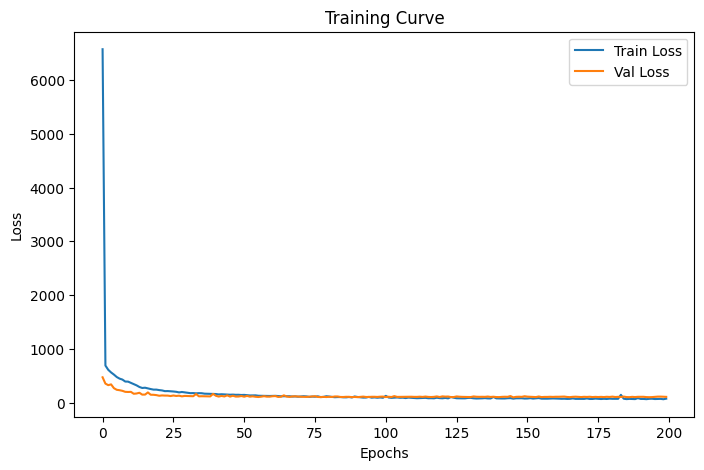

🔹 GRU Model - RMSE: 10.27
🔹 GRU Model - R² Score: 0.99


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_clean).reshape(X_train_clean.shape[0], 1, X_train_clean.shape[1])
X_test_scaled = scaler.transform(X_test_df).reshape(X_test_df.shape[0], 1, X_test_df.shape[1])

model = Sequential([
    Bidirectional(GRU(128, activation='swish', return_sequences=True, kernel_regularizer=l2(0.0005), input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2]))),
    Dropout(0.2),
    GRU(64, activation='swish', return_sequences=False, kernel_regularizer=l2(0.0005)),
    Dropout(0.2),
    Dense(32, activation='swish'),
    Dense(1, activation='linear')
])

optimizer = Adam(learning_rate=0.001, clipnorm=1.0)  
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

history = model.fit(
    X_train_scaled, y_train_clean,
    validation_data=(X_test_scaled, y_test),
    epochs=200,  
    batch_size=32,
    verbose=1
)

y_pred_gru = model.predict(X_test_scaled)

rmse_gru = np.sqrt(mean_squared_error(y_test, y_pred_gru))
r2_gru = r2_score(y_test, y_pred_gru)

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Curve')
plt.legend()
plt.show()

print(f"🔹 GRU Model - RMSE: {rmse_gru:.2f}")
print(f"🔹 GRU Model - R² Score: {r2_gru:.2f}")


Epoch 1/300


/Users/me.pranesh/Desktop/new clean/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


602/602 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 18750.8145 - mae: 100.5882 - val_loss: 636.7643 - val_mae: 16.9665
Epoch 2/300
602/602 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 913.9343 - mae: 21.3068 - val_loss: 413.4159 - val_mae: 13.6451
Epoch 3/300
602/602 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 778.4268 - mae: 19.5393 - val_loss: 377.0806 - val_mae: 12.8709
Epoch 4/300
602/602 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 691.6331 - mae: 18.2448 - val_loss: 433.2992 - val_mae: 14.1003
Epoch 5/300
602/602 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 619.2137 - mae: 17.3817 - val_loss: 310.9102 - val_mae: 11.2781
Epoch 6/300
602/602 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 600.6378 - mae: 17.0142 - val_loss: 291.2910 - val_mae: 10.9845
Epoch 7/300
602/602 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 588.3708 - mae: 16.5042 - val_loss: 290.9907 - val_mae: 10.9563
Epoch 8/300
602/602 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 606.8854 - mae: 16.6305 - val_loss: 267.5975 - val_mae: 10.2297
Epoch 9/3

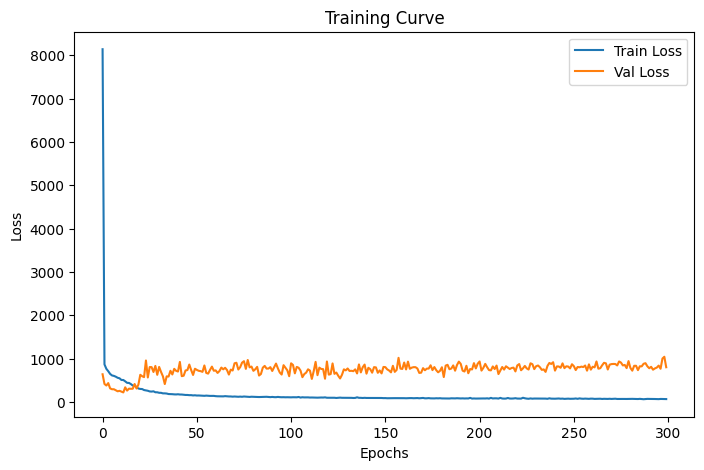

🔹 Enhanced GRU Model - RMSE: 28.20
🔹 Enhanced GRU Model - R² Score: 0.93


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Bidirectional, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_clean)
X_test_scaled = scaler.transform(X_test_df)

X_train_scaled = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

model = Sequential([
    Bidirectional(GRU(256, activation='swish', return_sequences=True, kernel_regularizer=l2(0.0005), input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2]))),
    Dropout(0.2),
    GRU(128, activation='swish', return_sequences=True, kernel_regularizer=l2(0.0005)),
    Dropout(0.2),
    GRU(64, activation='swish', return_sequences=False, kernel_regularizer=l2(0.0005)),
    Dropout(0.2),
    Dense(32, activation='swish'),
    Dense(1, activation='linear')
])

optimizer = Adam(learning_rate=0.0005, clipnorm=1.0)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

history = model.fit(
    X_train_scaled, y_train_clean,
    validation_data=(X_test_scaled, y_test),
    epochs=300, 
    batch_size=32,
    verbose=1
)

y_pred_gru = model.predict(X_test_scaled)

rmse_gru = np.sqrt(np.mean((y_test - y_pred_gru.squeeze()) ** 2))
r2_gru = 1 - (np.sum((y_test - y_pred_gru.squeeze())**2) / np.sum((y_test - np.mean(y_test))**2))

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Curve')
plt.legend()
plt.show()

print(f"🔹 Enhanced GRU Model - RMSE: {rmse_gru:.2f}")
print(f"🔹 Enhanced GRU Model - R² Score: {r2_gru:.2f}")


Epoch 1/100


/opt/anaconda3/envs/my_new_env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 8.7376 - val_loss: 7.7942
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.3035 - val_loss: 7.2321
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.7714 - val_loss: 6.7585
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.9177 - val_loss: 6.2990
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.5725 - val_loss: 5.8138
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.6887 - val_loss: 5.3015
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.3981 - val_loss: 4.7443
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.9759 - val_loss: 4.1609
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.1631 - val_loss: 3.5546
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.5077 - val_loss: 2.9374
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.8234 - val_loss: 2.3482
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.3057 - val_loss: 1.8093
Epoch 13/1

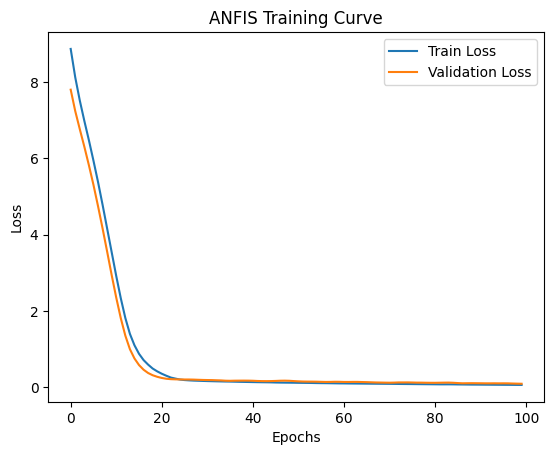

In [95]:
import numpy as np
import tensorflow as tf
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_clean)
X_test_scaled = scaler.transform(X_test_df)

def fuzzy_membership(x, low, mid, high):
    return fuzz.trimf(x, [low, mid, high])

fuzzy_inputs = []
for i in range(X_train_scaled.shape[1]):
    var = ctrl.Antecedent(np.linspace(-3, 3, 100), f'feature_{i}')
    var['low'] = fuzz.trimf(var.universe, [-3, -2, -1])
    var['medium'] = fuzz.trimf(var.universe, [-1, 0, 1])
    var['high'] = fuzz.trimf(var.universe, [1, 2, 3])
    fuzzy_inputs.append(var)

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),  
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')  
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

history = model.fit(X_train_scaled, y_train_clean, validation_data=(X_test_scaled, y_test), epochs=100, batch_size=32, verbose=1)

y_pred_anfis = model.predict(X_test_scaled)
rmse_anfis = np.sqrt(mean_squared_error(y_test, y_pred_anfis))

print(f"🔹 ANFIS Model - RMSE: {rmse_anfis:.2f}")

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('ANFIS Training Curve')
plt.legend()
plt.show()


In [99]:
import optuna
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def objective(trial):
    params = {
        "objective": "reg:squarederror",
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 1),
        "lambda": trial.suggest_float("lambda", 0, 10),
        "alpha": trial.suggest_float("alpha", 0, 10),
        "random_state": 42
    }

    model = xgb.XGBRegressor(**params)
    model.fit(X_train_clean, y_train_clean)
    y_pred = model.predict(X_test_df)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return rmse

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

best_params = study.best_params
optimized_xgb = xgb.XGBRegressor(**best_params)
optimized_xgb.fit(X_train_clean, y_train_clean)

y_pred_xgb = optimized_xgb.predict(X_test_df)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print(f" Optimized XGBoost Model - RMSE: {rmse_xgb:.2f}")
print(f" Optimized XGBoost Model - Best Parameters: {best_params}")


/opt/anaconda3/envs/my_new_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-02-20 00:58:27,778] A new study created in memory with name: no-name-e61a4eb4-ee5e-4fe6-bb58-ddb81c666e2d
[I 2025-02-20 00:58:27,910] Trial 0 finished with value: 0.2327153385751782 and parameters: {'n_estimators': 322, 'learning_rate': 0.025283600420828882, 'max_depth': 7, 'min_child_weight': 2, 'subsample': 0.7203617890267988, 'colsample_bytree': 0.8882567859845867, 'gamma': 0.6557606866255726, 'lambda': 5.411039738814689, 'alpha': 0.08902598348579538}. Best is trial 0 with value: 0.2327153385751782.
[I 2025-02-20 00:58:28,131] Trial 1 finished with value: 0.30726675497014744 and parameters: {'n_estimators': 994, 'learning_rate': 0.240310464323584, 'max_depth': 9, 'min_child_weight': 3, 'subsample': 0.620563359726808

🔹 Optimized XGBoost Model - RMSE: 0.19
🔹 Optimized XGBoost Model - Best Parameters: {'n_estimators': 706, 'learning_rate': 0.2698713756699468, 'max_depth': 11, 'min_child_weight': 8, 'subsample': 0.5825600800688615, 'colsample_bytree': 0.8786123732854083, 'gamma': 0.005010945539420749, 'lambda': 9.064078512341762, 'alpha': 1.5488945146006134}


In [100]:
from sklearn.model_selection import cross_val_score

cv_rmse = np.sqrt(-cross_val_score(optimized_xgb, X_train_clean, y_train_clean, 
                                   scoring='neg_mean_squared_error', cv=5))
print(f"🔹 Cross-Validation RMSE Scores: {cv_rmse}")
print(f"🔹 Mean CV RMSE: {cv_rmse.mean():.2f}")


🔹 Cross-Validation RMSE Scores: [0.14326249 0.20814351 0.34096241 0.19246225 0.23112977]
🔹 Mean CV RMSE: 0.22


In [103]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

xgboost_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=706,
    learning_rate=0.2698713756699468,
    max_depth=11,
    min_child_weight=8,
    subsample=0.5825600800688615,
    colsample_bytree=0.8786123732854083,
    gamma=0.005010945539420749,
    reg_lambda=9.064078512341762,
    reg_alpha=1.5488945146006134,
    random_state=42
)

xgboost_model.fit(X_train_clean, y_train_clean)

y_pred_xgboost = xgboost_model.predict(X_test_df)

rmse_xgboost = np.sqrt(mean_squared_error(y_test, y_pred_xgboost))
mse_xgboost = mean_squared_error(y_test, y_pred_xgboost)
mae_xgboost = mean_absolute_error(y_test, y_pred_xgboost)
r2_xgboost = r2_score(y_test, y_pred_xgboost)

print(f" Optimized XGBoost Model - RMSE: {rmse_xgboost:.2f}")
print(f" Optimized XGBoost Model - MSE: {mse_xgboost:.2f}")
print(f" Optimized XGBoost Model - MAE: {mae_xgboost:.2f}")
print(f" Optimized XGBoost Model - R² Score: {r2_xgboost:.2f}")


🔹 Optimized XGBoost Model - RMSE: 0.18
🔹 Optimized XGBoost Model - MSE: 0.03
🔹 Optimized XGBoost Model - MAE: 0.14
🔹 Optimized XGBoost Model - R² Score: 0.97
